In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc
import _ressources.network as net

from scipy.optimize import curve_fit

main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/single_lumen'
eps = 1e-3
mu = net.calc_muj_list(theta_list=np.pi/3.)
nu = net.calc_nuj_list(theta_list=np.pi/3.)

In [2]:
def calc_t_final(L0, tauv) :
    global eps, mu, nu
    Lf = 1e-1
    return 0.5*(L0**2 - Lf**2)*tauv/eps*mu*nu

# No leaks, pumping

======= CHAIN =======
Type         : hydroosmotic
Total length : 15.348692075478356
Current Time : 0
Screening lengths : 
        xi_s = 3647.88549849103
        xi_v = 3647.88549849103
Permeation times :
       tau_s = 1.0
       tau_v = 1.0
Pumping : constant
======= LUMENS =======
Nb lumens : 2
Lumen 0 is at position 0.00000 with length 0.00000 and 0.00000 ions with pumping 0.00000
Lumen 1 is at position 2.32487 with length 1.32487 and 2.87484 ions with pumping 0.00000
Lumen 2 is at position 13.47104 with length 0.87765 and 1.26156 ions with pumping 0.00000
Lumen -1 is at position 15.34869 with length 0.00000 and 0.00000 ions with pumping 0.00000
======= BRIDGES ======
Bridge 0 : (0, 1) has length 1.00000 with pumping 0.00000
Bridge 1 : (1, 2) has length 8.94366 with pumping 0.00000
Bridge 2 : (2, -1) has length 1.00000 with pumping 0.00000

Import successful !


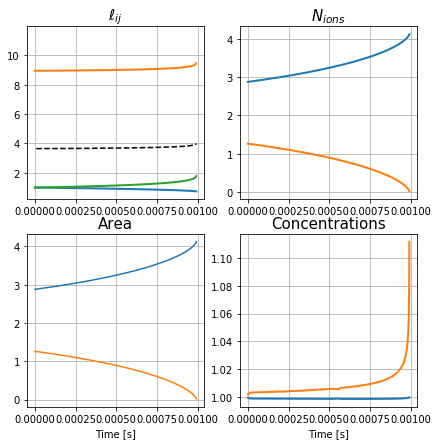

In [192]:
subdir = 'leaks_1'
conf, ch = chain.load_config(os.path.join(main_dir, subdir, 'config.conf'))
print(ch)
x = np.linspace(0., ch.total_length, 1001)
#tools.plot_profile(x, ch)

ell = tools.load_brfile(os.path.join(main_dir, subdir, 'sim_bridges.dat'))

x_log = 0

if ch.lumen_type == 'hydroosmotic' :
    L, nions, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=True)
    tools.plot_evolution(L, nions, ell, x_logscale=x_log)
else :
    L, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=False)
    tools.plot_evolution_hydraulic(L, ell, x_logscale=x_log)


t final (predicted) =  644.2653703957941
t final (simulation) =  0.000992248071194


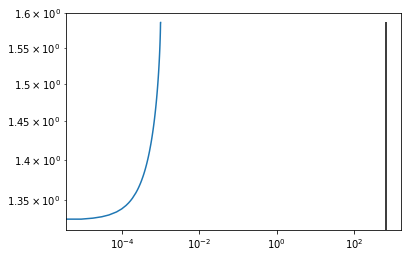

In [193]:
t_final_pred = calc_t_final(ch.lumens_dict[1].length, ch.tauv)
print('t final (predicted) = ', str(t_final_pred))
t_final_sim = np.max(L[:, 0])
print('t final (simulation) = ', str(t_final_sim))


plt.xscale('log')
plt.yscale('log')
plt.plot(L[:, 0], L[:, 1])
plt.vlines(x=t_final_pred, ymin=0., ymax = np.max(L[:, 1]))
plt.show()

In [181]:
f = open('/Users/mathieuleverge/git/chain_lumen/_data/single_lumen/final_time.txt', 'a')
f.write(str(ch.lumens_dict[1].length) + '\t' + str(t_final_pred) + '\t' + str(t_final_sim) + '\n')
f.close()

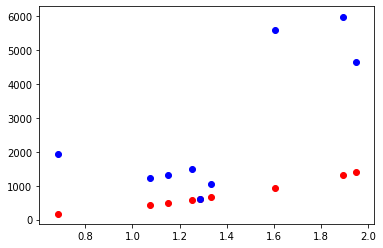

In [182]:
data = np.loadtxt('/Users/mathieuleverge/git/chain_lumen/_data/single_lumen/final_time.txt', skiprows=1)
#plt.xscale('log')
#plt.yscale('log')
plt.scatter(data[:, 0], data[:, 1], color='r', label = 'Predicted')
plt.scatter(data[:, 0], data[:, 2], color='b', label = 'Simulation')

# Leaks, pumping

======= CHAIN =======
Type         : hydroosmotic
Total length : 11.647229615002132
Current Time : 0
Screening lengths : 
        xi_s = 25.0
        xi_v = 25.0
Permeation times :
       tau_s = 1.0
       tau_v = 1.0
Pumping : constant
======= LUMENS =======
Nb lumens : 1
Lumen 0 is at position 0.00000 with length 0.00000 and 0.00000 ions with pumping 0.00100
Lumen 1 is at position 5.82361 with length 0.82361 and 1.11101 ions with pumping 0.00100
Lumen -1 is at position 11.64723 with length 0.00000 and 0.00000 ions with pumping 0.00100
======= BRIDGES ======
Bridge 0 : (0, 1) has length 5.00000 with pumping 0.00000
Bridge 1 : (1, -1) has length 5.00000 with pumping 0.00000

Import successful !


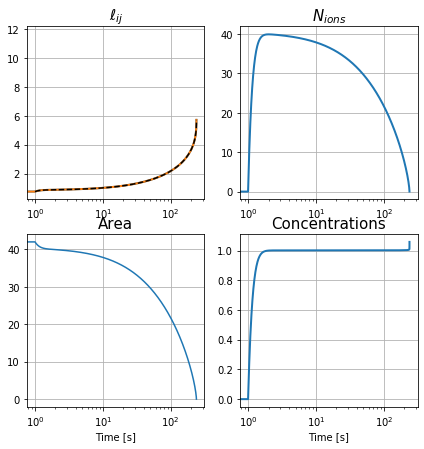

In [39]:
subdir = 'leaks_2'
conf, ch = chain.load_config(os.path.join(main_dir, subdir, 'config.conf'))
print(ch)
x = np.linspace(0., ch.total_length, 1001)
#tools.plot_profile(x, ch)

ell = tools.load_brfile(os.path.join(main_dir, subdir, 'sim_bridges.dat'))

x_log = 1

if ch.lumen_type == 'hydroosmotic' :
    L, nions, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=True)
    tools.plot_evolution(L, nions, ell, x_logscale=x_log)
else :
    L, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=False)
    #tools.plot_evolution_hydraulic(L, ell, x_logscale=x_log)





# Single Lumen pumping

Without any lumen nearby, a single lumen is described by the equations
$$\begin{align}
\tau_v \frac{dL}{dt} &= \mu \nu \left[ \delta C - \frac{\epsilon}{L} \right]\\
\tau_s \frac{dN}{dt} &= 2 \nu L \left[ c_a - \delta C \right] \\
\end{align}$$
Assuming $\frac{dL}{dt} = \frac{dN}{dt} = 0$ we have $\delta C = \frac{\epsilon}{L} = c_a$ thus 

$$\begin{align}
L &> \frac{\epsilon}{c_a} \, \text{ the lumen grows} \\
L &< \frac{\epsilon}{c_a} \, \text{ the lumen shrinks} \\
\end{align}$$


In [5]:
L_dict = {}

In [7]:

subdir = 'ca1e-3'
L_dict[subdir] = {}
for i in range(0, 50) :
    subsubdir = 'run'+str(i).zfill(4)
    #conf, ch = chain.load_config(os.path.join(main_dir, subdir, subsubdir, 'config.conf'))
    #print(ch)
    #x = np.linspace(0., ch.total_length, 1001)
    #tools.plot_profile(x, ch)

    #ell = tools.load_brfile(os.path.join(main_dir, subdir, 'sim_bridges.dat'))

    x_log = 0

    L, nions, pos = tools.load_file(os.path.join(main_dir, subdir, subsubdir, 'sim_all.dat'), hydroosmotic=True)
        #tools.plot_evolution(L, nions, ell, x_logscale=x_log)
    L_dict[subdir][i] = L
    #plt.plot(L[:, 0], L[:, 1])
    if i %10 == 0 : print(i)



Import successful !
0
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
10
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
20
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
30
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
40
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import

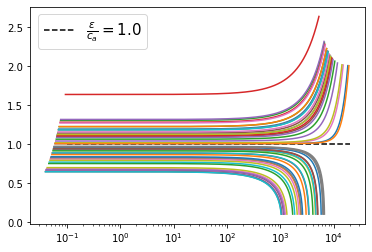

In [8]:
subdir = 'ca1e-3'
ca = 1e-3
plt.xscale('log')
for i in range(0, 50) : 
    try : 
        plt.plot(L_dict[subdir][i][1:, 0], L_dict[subdir][i][1:, 1])
    except : pass
plt.hlines(eps/ca, xmin=1e-1, xmax = 2e4, linestyle = '--', label = r'$\frac{\epsilon}{c_a} = $' + str(eps/ca))   
plt.legend(loc=2, fontsize=15)
plt.show()


Import config from /Users/mathieuleverge/git/chain_lumen/_data/single_lumen/ca5.623e-2/config
======= CHAIN =======
Type         : hydroosmotic
Total length : 4.0
Current Time : 0
Screening lengths : 
        xi_s = 0.01
        xi_v = 0.0261
Permeation times :
       tau_s = 1.0
       tau_v = 1.0
Pumping : constant
======= LUMENS =======
Nb lumens : 1
Lumen 0 is at position 0.00000 with length 0.00000 and 0.00000 ions with pumping 0.00000
Lumen 1 is at position 2.00000 with length 1.00000 and 1.63783 ions with pumping 0.00562
Lumen -1 is at position 4.00000 with length 0.00000 and 0.00000 ions with pumping 0.00000
======= BRIDGES ======
Bridge 0 : (0, 1) has length 1.00000 with pumping 0.00000
Bridge 1 : (1, -1) has length 1.00000 with pumping 0.00000



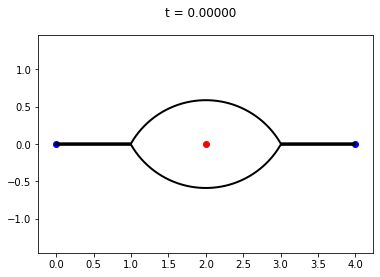

Import successful !


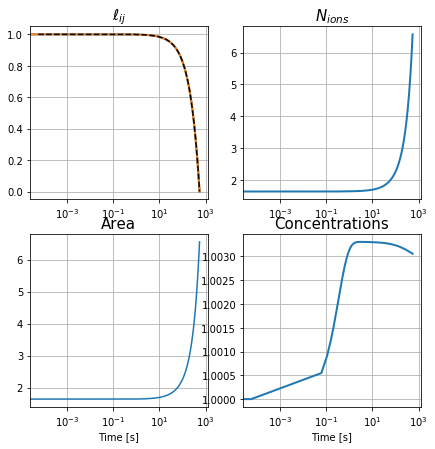

In [228]:
subdir = 'ca5.623e-2'
conf, ch = chain.load_config(os.path.join(main_dir, subdir, 'config.conf'))
print(ch)
x = np.linspace(0., ch.total_length, 1001)
tools.plot_profile(x, ch)

ell = tools.load_brfile(os.path.join(main_dir, subdir, 'sim_bridges.dat'))

x_log = 1

if ch.lumen_type == 'hydroosmotic' :
    L, nions, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=True)
    tools.plot_evolution(L, nions, ell, x_logscale=x_log)
else :
    L, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=False)
    #tools.plot_evolution_hydraulic(L, ell, x_logscale=x_log)


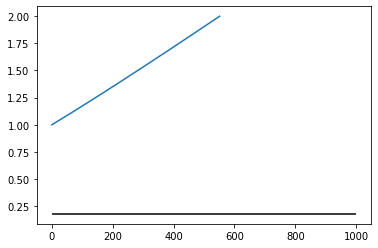

In [229]:
ca = 5.623e-3
plt.plot(L[1:, 0], L[1:, 1])
plt.hlines(eps/ca, xmin=1e-5, xmax=1000.)


# Diagram

In [10]:
npts = 501

eps_min, eps_max = 0., 10.
ca_min, ca_max = 0., 5.

eps_list = np.linspace(eps_min, eps_max, npts)
ca_list = np.linspace(ca_min, ca_max, 2*npts)

extent = [eps_min, eps_max, ca_min, ca_max]

In [11]:
L0 = 1.

fate_array = np.zeros((len(ca_list), len(eps_list)))

for i in range(len(eps_list)) :
    for j in range(len(ca_list)) :
        if ca_list[j] > eps_list[i]/L0 :
            fate_array[i, j] = 1.

IndexError: index 501 is out of bounds for axis 1 with size 501

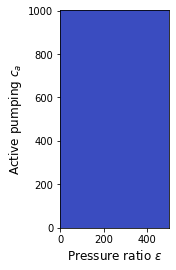

In [12]:
plt.imshow(fate_array, origin='lower', cmap='coolwarm')#, extent = extent)

plt.xlabel(r'Pressure ratio $\epsilon$', fontsize=12)
plt.ylabel(r'Active pumping $c_a$', fontsize=12)
plt.show()

In [13]:
L0 = eps/ca

# Single Lumen - Leaks

In [1]:
subdir = 'leaks'
conf, ch = chain.load_config(os.path.join(main_dir, subdir, 'config.conf'))
#print(ch)
x = np.linspace(0., ch.total_length, 1001)
#tools.plot_profile(x, ch)

ell = tools.load_brfile(os.path.join(main_dir, subdir, 'sim_bridges.dat'))

x_log = 1

if ch.lumen_type == 'hydroosmotic' :
    L, nions, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=True)
    tools.plot_evolution(L, nions, ell, x_logscale=x_log)
else :
    L, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=False)
    #tools.plot_evolution_hydraulic(L, ell, x_logscale=x_log)




NameError: name 'chain' is not defined

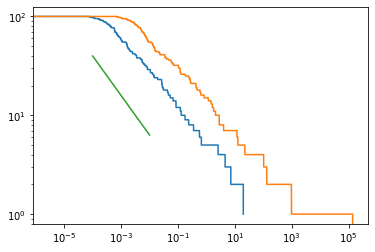

In [109]:
Nt_0 = np.loadtxt(os.path.join(main_dir, 'leaks', 'sim_nlum.dat'))
Nt_1 = np.loadtxt(os.path.join(main_dir, 'leaks_1', 'sim_nlum.dat'))

plt.xscale('log')
plt.yscale('log')

plt.plot(Nt_1[:, 0], Nt_1[:, 1])
plt.plot(Nt_0[:, 0], Nt_0[:, 1])

k, a = 1, -2./5
t = np.logspace(-4, -2)
plt.plot(t, k*t**a)


In [108]:
a = -1.
a == -1.

True

In [84]:
i, j, k = 0, 1, -1
leaks = False

In [85]:

if i==0 or i==-1 or j == 0 or j== -1 and not leaks: print(i, ' is border')

0  is border


In [40]:
theta = np.pi/3
mu = np.sin(theta)**2/(2*theta - np.sin(2*theta))
nu = theta/np.sin(theta)
epsilon, tauv = 1e-2, 1.

def dLdt(L, t) :
    global epsilon, mu, nu, tauv
    Lmin=0.1
    print(t, L, Lmin)
    if L > Lmin :
        return - mu*nu*epsilon/(L*tauv)
    else : return 0.

In [41]:
from scipy.integrate import odeint

In [43]:
L0 = 10.

t = np.linspace(0., 200, 101)

sol = odeint(dLdt, y0=[L0], t = t)

0.0 [10.] 0.1
0.00024414094070018377 [9.99999982] 0.1
0.0004882818814003675 [9.99999964] 0.1
2.441897688883238 [9.998197] 0.1
2.441897688883238 [9.998197] 0.1
4.883307095885076 [9.99639403] 0.1
4.883307095885076 [9.99639403] 0.1
7.324716502886914 [9.99459073] 0.1
7.324716502886914 [9.99459073] 0.1
31.738810572905294 [9.97653987] 0.1
31.738810572905294 [9.97653986] 0.1
56.15290464292367 [9.95845627] 0.1
56.15290464292367 [9.95845628] 0.1
80.56699871294205 [9.94033979] 0.1
80.56699871294205 [9.94033979] 0.1
104.98109278296043 [9.92219023] 0.1
104.98109278296043 [9.92219023] 0.1
319.09120097606075 [9.76157432] 0.1
319.09120097606075 [9.76157406] 0.1


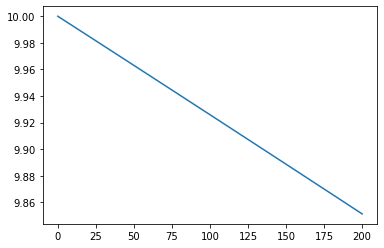

In [44]:
plt.plot(t, sol)
